# 타이타닉 데이터를 활용한 이진 생존 분류
- Downloads https://www.kaggle.com/c/titanic
- kaggle.com - 데이터 공개 사이트. 회사에서 데이터 공개 후 분석 잘하는 사람에게 상금 주는 대회 개최.

### 1. Data Descripstion
- total : 139명
- train.csv : 891 x 12
- test.csv : 418 x 11

- Survival : 0=No, 1=Yes
- Pclass : 1=1st, 2=2nd, 3=3rd (숫자가 낮을 수록 높은 등급)
- SibSp = Siblings-Spouses
- Parch = Parants-Children

### 2. Import module

- 모듈 호출시 as를 붙여 줄여서 부를 수 있음. ex) numpy->np, tensorflow->tf

In [1]:
import pandas as pd  #데이터 전처리, 탐색, 분석
import numpy as np  #t수치해석 모듈
import matplotlib.pyplot as plt  #그래프 그리는 모듈

### 3. Data Load

- read_csv() : csv파일 읽어주는 pandas모듈의 함수
- 경로 : 범용성을 위해 상대경로를 사용한다.
    - 절대 경로 : 대상의 경로를 처음부터 끝까지 모두 표시
    - 상대 경로 : 해당 노트북 파일의 경로를 시 작점으로 대상의 경로 설명.
        - ' . ' : 현재
        - ' .. ' : 뒤로가기
        - ' / ' : 들어가기
- head() 데이터 프레임의 처음 다섯건만 표시, tale() :마지막 다섯건만 표시

In [2]:
df_train=pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(type(df_train))
print(type(df_test)) #데이터 타입 알려줌. dataframe형태.

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### 4. Data Exloration

data size 확인

In [4]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


Feature 목록 추출 및 Type

In [5]:
print(df_train.columns)
print(df_train.columns.values) # list 타입

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


 info함수 : data type 및 null(결측치 있는지) 확인
- PassengerId  891 non-null    int64: 891개의 데이터중 null 이 없음, 정수형
- Cabin        204 non-null    object  : 891중 204개 빼고 결측치, 문자열
- cabin, age, embarked : 3가지 feature Null 존재
- null 결측치를 어떻게 처리할 것인지?
    - 해당 feature 다 지워버리기
    - 결측치를 해당 feature의 평균값으로 채우기 등..

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# column별 결측치 합계
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

describe() : feature의 특징들 기술. 수치형만 계산. 문자형(object)는 안나옴.

In [8]:
df_train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe(include=["O"])
- Object 데이터형도 보여줌.
- unique : 값 종류 개수 보여줌.
    - ticket : 중복되는 티겟이 여러 사람에게 동시 발행됨, 가족단위라고 추론할 수 있음.

In [9]:
df_train.describe(include=["O"]) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


column category 확인
- 해당 칼럼(survived)의 값 확인

In [10]:
df_train["Survived"].unique()

array([0, 1], dtype=int64)

칼럼의 값 가지는 개수 확인
- 549명 사망 342명 생존
    - 데이터 밸런스가 대충 맞으므로 골고루 학습 가능 (한 데이터가 너무 많으면 해당 feature만 잘 맞힘)

In [11]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

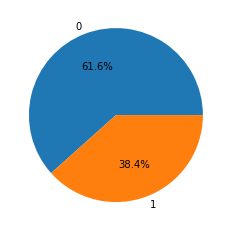

In [12]:
ratio=df_train["Survived"].value_counts()
labels=df_train["Survived"].unique()
plt.pie(ratio, labels=labels, autopct="%.1f%%")
plt.show()